# Laboratorio 2
__Integrantes:__ 

- Santiago Martínez Novoa - 202112020

- María Alejandra Estrada García - 202021060

- Marilyn Stephany Joven Fonseca - 202021346


## Caso de Negocio: Predicción de muertes per capita de cáncer

La Organización Mundial de la Salud está piloteando un nuevo programa de financiamiento que busca intervenir en poblaciones con un alto número de fallecimientos debido al cáncer. El objetivo es permitirle a los gobiernos nacionales y locales invertir en programas de diagnóstico temprano, instalaciones de tratamiento, entrenamiento de personal hospitalario y financiamiento de la investigación en esta enfermedad. Debido a que este programa busca beneficiar al mediano y largo plazo poblaciones vulnerables, se ha determinado la necesidad de crear un modelo predictivo para empezar interviniendo poblaciones que, dadas sus características, tengan un alto número de muertes por cáncer aunque no haya registros completos u oficiales.

Para ello y de la mano del gobierno norteamericano, la OMS ha recopilado datos de Estados Unidos para la creación del modelo a partir de diversas características demográficas y del estado de los servicios de salud de una población para determinar el número de muertes por cáncer por cada 100.000 habitantes. El objetivo, es que este modelo permita tomar decisiones de la asignación de finaciamiento del nuevo programa, además de determinar qué datos son relevantes y cuáles no lo son para la estimación y la recolección de información.

## Instrucciones

La OMS desea que usted los apoye en la construcción del modelo de regresión previamente descrito utilizando algunas de las etapas de la metodología "ASUM-DM":


1. __Entendimiento de los datos:__ 
Describir la característica más relevantes de los datos, incluir el análisis de calidad de datos y hacer una preselección de las variables más importantes para la etapa de modelado.


2. __Preparación de datos:__ Solucionar cualquier problema de calidad de datos previamente identificado. Además, debe aplicar cualquier proceso de preprocesamiento de datos necesario para la construcción del modelo de regresión.


3. __Modelado:__ Utilizando las variables previamente seleccionadas, construir un modelo de regresión que estime la variable objetivo con el menor error posible.


4. __Evaluación cuantitativa:__ A partir de las métricas seleccionadas para evaluar y seleccionar el mejor modelo, explicar el resultado obtenido desde el punto de vista cuantitativo. Contestar a la pregunta: ¿Su equipo recomienda utlizar en producción el modelo de estimación de precios de portátiles o es preferible continuar haciendo estimaciones de forma manual? En caso de no recomendar el uso del modelo, ¿qué recomendaciones haría para continuar iterando con el objetivo de la construcción de un mejor modelo?


5. __Evaluación cualitativa:__ Debe estar compuesta de dos partes:
- Validación de supuestos: Realizar los ajustes necesarios para que el modelo cumpla con los supuestos necesarios para la inferencia estadística con regresiones.
- Interpretación de los coeficientes: Realizar la interpretación de los coeficientes de la regresión, identificando las variables más relevantes para la estimación y como afectan la variable objetivo.


6. __Visualización de los resultados:__ Integrar el resultado obtenido con el modelo de regresión a un tablero de control para apoyar el objetivo de la empresa.


7. __Exportar el mejor modelo (utilizando pipelines):__ 
Para poder ser usado sobre datos nuevos en el ambiente de producción del cliente.


8. __Predicciones:__
Generar predicciones sobre los datos de prueba que no se encuentran etiquetados utilizando el mejor modelo. Exportar las predicciones en formato CSV utlizando como base el mismo archivo de datos de prueba.

## 0. Preparación inicial

### 0.1. Librerías (Importación)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from ydata_profiling import ProfileReport

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import GridSearchCV

### 0.2. Carga de datos

In [2]:
#Obtener el dataframe de entrenamiento
train = pd.read_csv('/work/202410_Laboratorio 2 - Regresión_train_data.csv')

#Obtener el dataframe de validación/test
validation = pd.read_csv('/work/202410_Laboratorio 2 - Regresión_val_data.csv')

#Cargar el diccionario
dict_c=pd.read_excel('/work/202410_Laboratorio 2 - Regresión_Diccionario_OMS_Cancer.xlsx')

Se comprueba la carga de los datos de entrenamiento

In [3]:
train.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate
0,37.0,13,521.9,36836,4201,18.3,0.0,"(34218.1, 37413.8]",47.5,44.9,...,30.2,43.2,20.0,88.570752,0.118315,1.135826,0.141978,47.157360,10.704225,169.4
1,107.0,37,412.7,48683,20455,11.7,0.0,"(48021.6, 51046.4]",43.1,42.4,...,44.4,35.7,17.8,97.797657,0.486169,0.116680,0.486169,53.723161,6.550868,131.8
2,22.0,12,472.9,60946,3294,7.4,0.0,"(54545.6, 61494.5]",43.6,43.4,...,48.6,24.5,5.7,95.560385,0.124185,0.000000,2.390562,55.846042,9.935897,209.3
3,20.0,10,527.2,29477,2302,29.5,0.0,"[22640, 34218.1]",49.2,46.8,...,24.7,53.6,27.8,49.613070,49.226139,0.386930,0.000000,38.522167,8.616188,250.0
4,56.0,19,446.4,38478,11310,23.6,0.0,"(37413.8, 40362.7]",37.5,37.4,...,29.8,35.5,20.6,88.516367,0.079197,0.167195,4.593453,52.379740,9.079392,152.5


Se comprueba la carga de los datos de validación

In [4]:
validation.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,250.0,97,461.8,37782,41516,23.2,0.000000,"(37413.8, 40362.7]",42.6,42.2,...,35.0,28.3,46.4,28.7,75.106455,0.616955,0.866157,8.356721,51.013900,4.204317
1,938.0,334,444.5,72973,224469,5.8,280.662363,"(61494.5, 125635]",38.7,37.3,...,71.4,64.9,20.8,9.6,89.673330,3.456320,4.511723,0.631605,63.683814,4.708367
2,29.0,16,372.0,36566,5651,20.9,0.000000,"(34218.1, 37413.8]",42.3,39.8,...,NaN,25.8,41.5,22.3,71.920165,0.481762,0.172058,1.531315,49.431818,4.588745
3,29.0,9,537.2,43523,7121,12.4,0.000000,"(42724.4, 45201]",30.7,29.1,...,43.7,36.6,30.0,21.8,88.979184,1.254634,0.969490,4.348446,49.512411,9.422492
4,499.0,215,457.8,40921,79545,20.2,0.000000,"(40362.7, 42724.4]",43.4,41.4,...,NaN,33.4,39.3,21.8,89.311026,6.803685,0.592285,1.157993,55.248489,5.769696


## 1. Entendimiento de los datos

### 1.1. Exploración de los datos

En primer lugar hay que realizar una exploración y un entendimiento de las columnas que posee el dataset, mediante el diccionario provisto por el negocio.

In [5]:
dict_c

,Atributo,Descripción
0,deathRate,Muertes promedio de cáncer por cada 100.000 ha...
1,avgAnnCount,Número promedio de casos diagnosticados de cán...
2,avgDeathsPerYear,Número promedio de muertes reportadas por cáncer
3,incidenceRate,Número de diagnósticos promedio de cáncer por ...
4,medianIncome,Ingreso mediano por condado
5,poEst2015,Población del condado
6,povertyPercent,Porcentaje de la población en la pobreza
7,studyPerCap,Número de ensayos clínicos relacionados con el...
8,binedInc,Ingreso mediano per capita (clasificado por de...
9,MedianAge,Edad mediana de los residentes del condado


Gracias a la tabla es posible observar que solo existe una columna categórica la cual es Geography, y hay 33 columnas numéricas. A continuación se revisará que el tipo de cada columna corresponda al determinado por el diccionario.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2132 non-null   float64
 1   avgDeathsPerYear         2132 non-null   int64  
 2   incidenceRate            2132 non-null   float64
 3   medIncome                2132 non-null   int64  
 4   popEst2015               2132 non-null   int64  
 5   povertyPercent           2132 non-null   float64
 6   studyPerCap              2132 non-null   float64
 7   binnedInc                2132 non-null   object 
 8   MedianAge                2132 non-null   float64
 9   MedianAgeMale            2132 non-null   float64
 10  MedianAgeFemale          2132 non-null   float64
 11  Geography                2132 non-null   object 
 12  AvgHouseholdSize         2132 non-null   float64
 13  PercentMarried           2132 non-null   float64
 14  PctNoHS18_24            

Se comprueba que no existen inconsistencias frente a los tipos de cada columna en el Dataframe. Como Bined Inc también es un objeto debido a que expresa el ingreso mediano per Capita como un intervalo es necesario transformarlo como si fuera una variable categórica

Posteriormente se revisan las columnas numéricas en búsqueda de datos que sean erróneos o que contradiga la definición dada por el diccionario de las columnas.

In [7]:
train.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate
count,2132.000000,2132.000000,2132.000000,2132.000000,2.132000e+03,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,613.385785,183.537992,448.816467,47029.474203,1.025064e+05,16.889681,158.003002,44.298687,39.559475,42.140009,...,41.237899,36.305113,19.282786,83.686321,9.132512,1.260485,1.953356,51.228950,5.643918,179.000047
std,1435.393846,507.649052,53.582307,12107.930677,3.442282e+05,6.415614,533.636824,39.522898,5.208212,5.272267,...,9.326155,7.847326,6.136426,16.588379,14.613785,2.745672,3.484569,6.565620,1.980214,27.416156
min,6.000000,3.000000,201.300000,22640.000000,8.290000e+02,3.200000,0.000000,23.500000,22.800000,22.800000,...,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,59.700000
25%,77.000000,28.000000,421.600000,38875.750000,1.154725e+04,12.200000,0.000000,37.700000,36.300000,39.000000,...,34.600000,30.975000,14.900000,77.560360,0.614838,0.263542,0.278374,47.749949,4.520411,161.875000
50%,174.500000,62.000000,453.549422,45207.000000,2.693200e+04,15.900000,0.000000,40.900000,39.600000,42.300000,...,41.300000,36.400000,18.900000,90.122747,2.214754,0.538013,0.781727,51.595091,5.383877,178.550000
75%,515.250000,141.000000,481.600000,52376.250000,6.663525e+04,20.300000,79.275307,44.000000,42.600000,45.400000,...,47.600000,41.425000,23.200000,95.600016,10.709158,1.190457,2.171349,55.398869,6.478029,195.300000
max,38150.000000,14010.000000,1014.200000,125635.000000,1.017029e+07,47.400000,9439.200444,619.200000,64.700000,65.700000,...,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,37.859023,78.075397,21.326165,293.900000


Gracias a esta tabla también es posible identificar que no hay valores nulos en nignuna de las columnas, así como tampoco existen valores por fuera de los rangos, lo cual facilita el cumplimiento de las métricas de calidad de los datos.

In [8]:
print(f"El número de atributos es: {train.shape[1]} y el número de instancias es: {train.shape[0]}")

El número de atributos es: 34 y el número de instancias es: 2132


In [9]:
print("Total de registros duplicados iniciales: ",train.duplicated(keep = False).sum())

Total de registros duplicados iniciales:  0


No hay elementos duplicados en todo el registro.

### 1.2. Análisis exploratorio de los datos

#### 1.2.1 Comportamiento variables categóricas 

Luego de haber realizado la exloración de los datos se tomaron las siguientes decisiones. Como el objetivo es encontrar cuales son las condiciones que hacen más propensa a una población de sufrir cancer se comparará esta contra el resto de las variables, como solo hay una sola categórica se va a comprobar su cardinalidad.

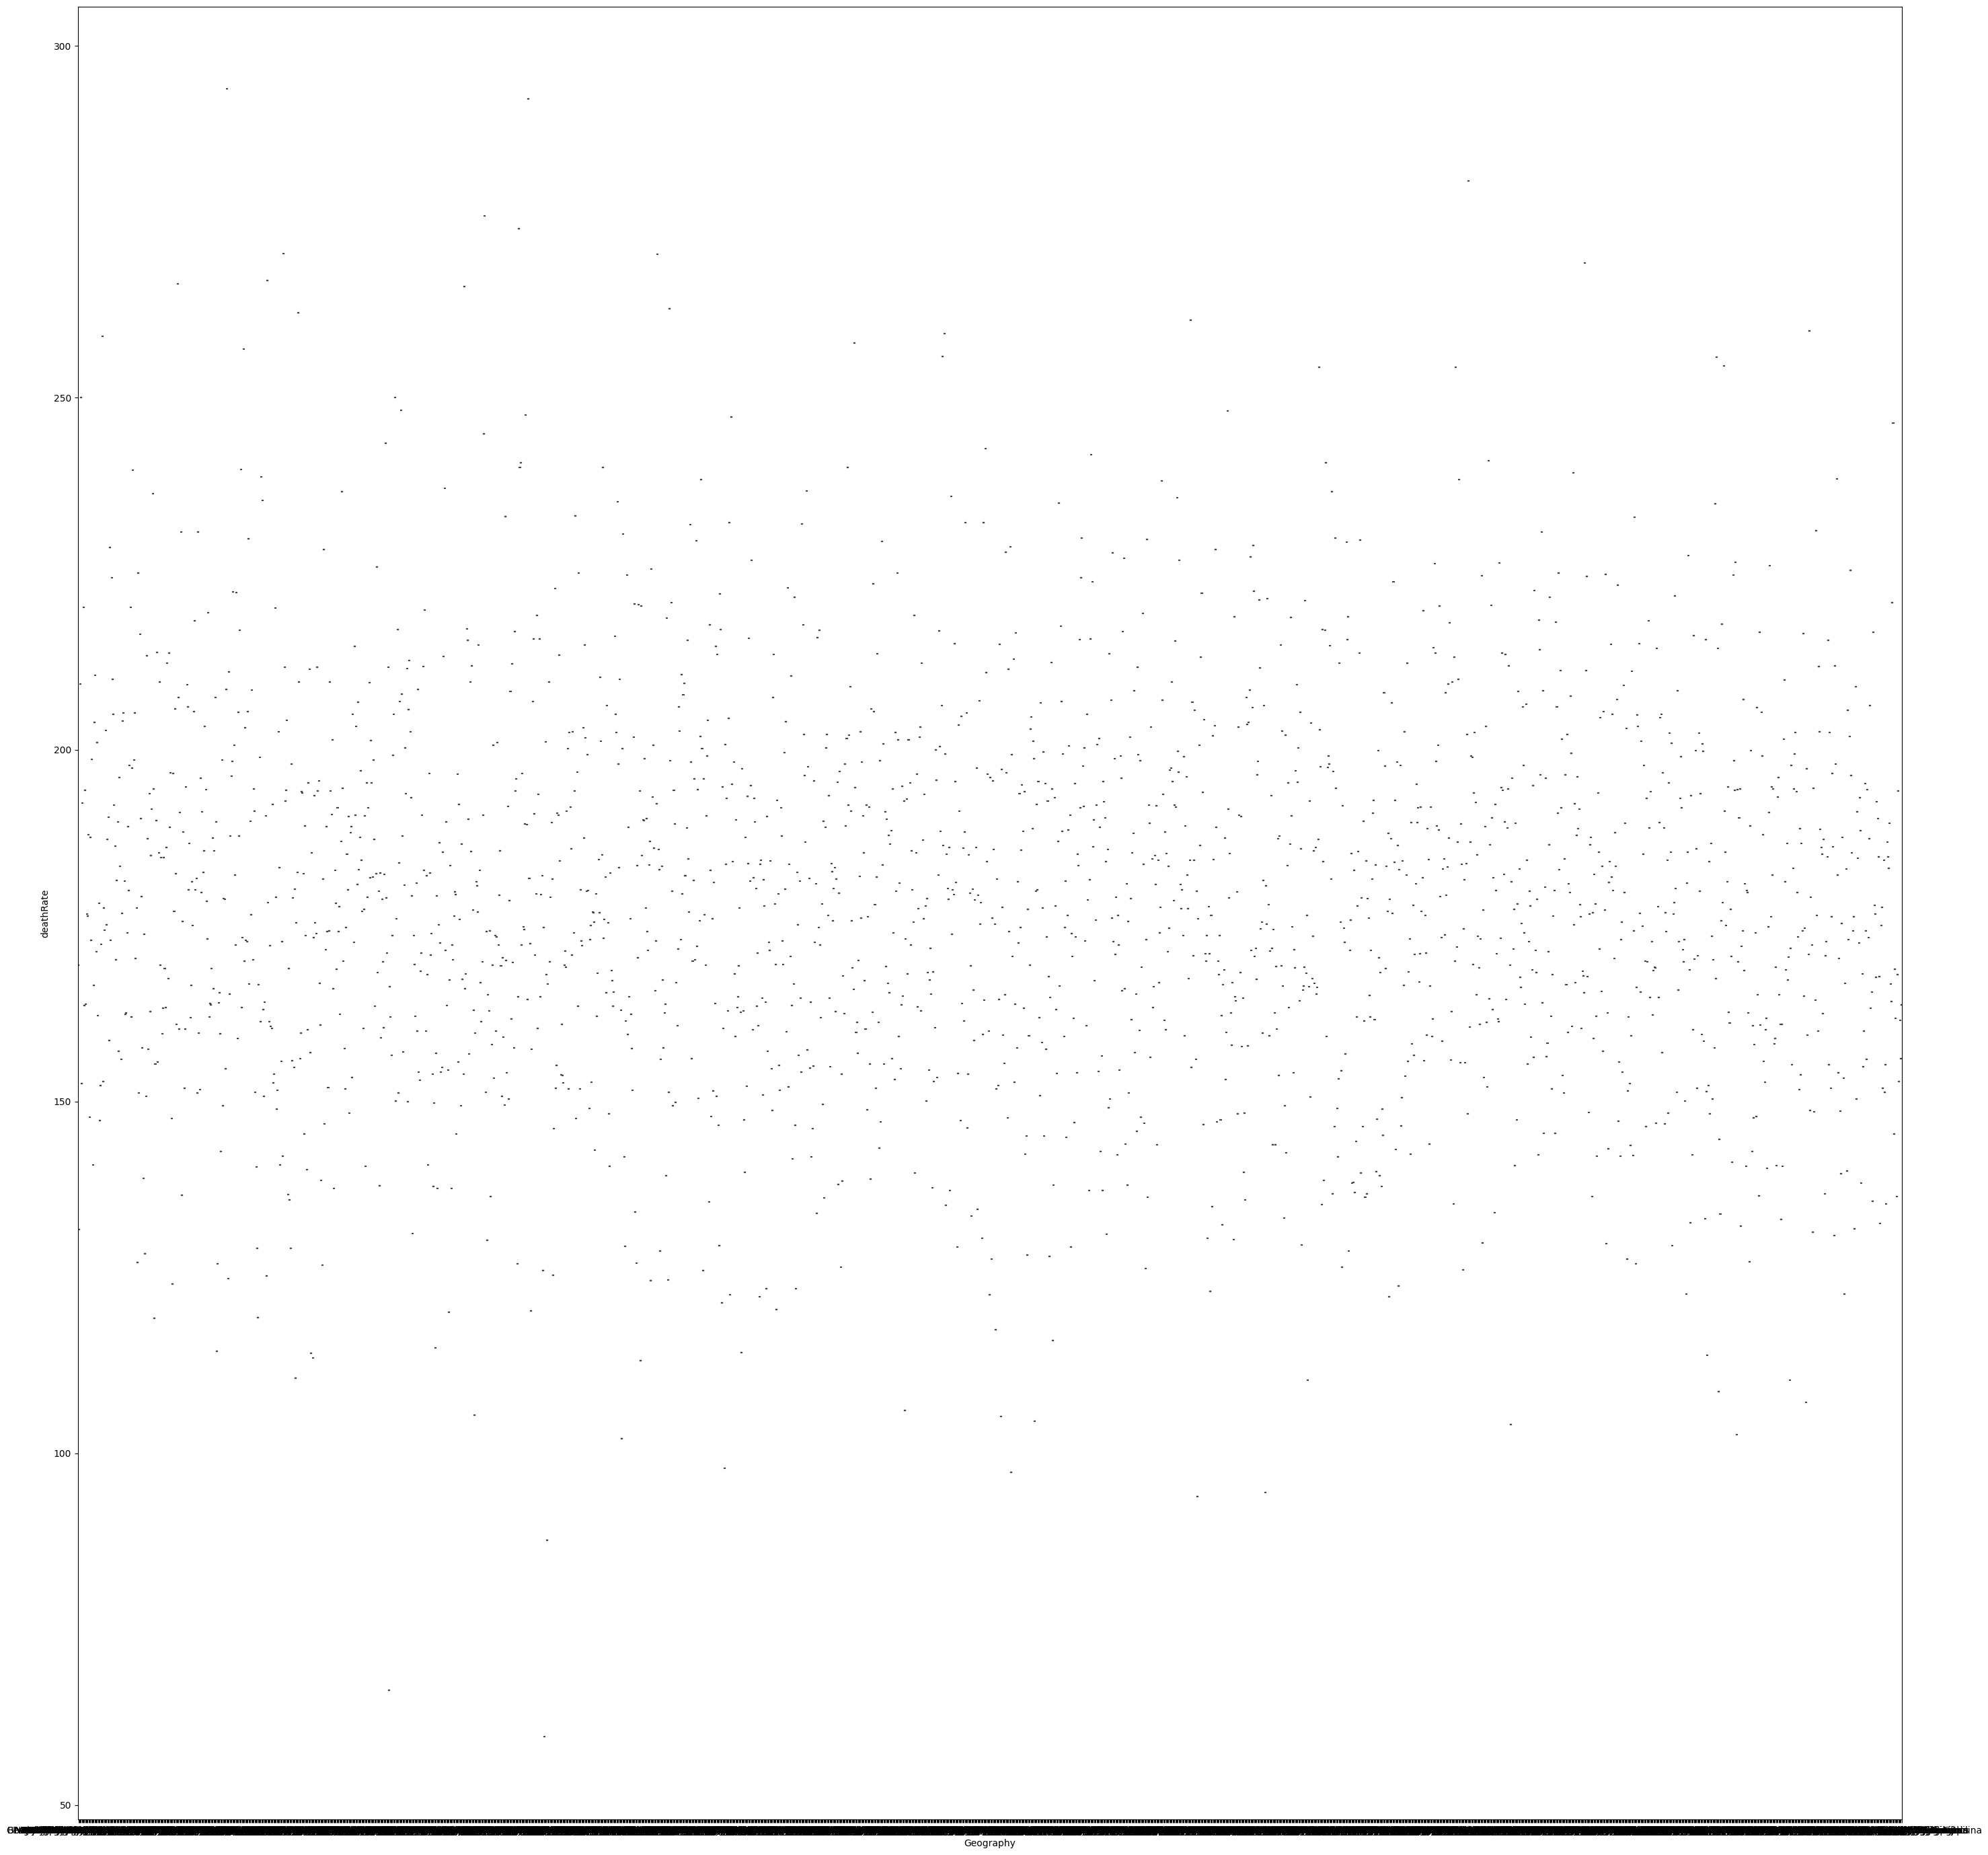

In [10]:
plt.figure(figsize=(35, 35))
sns.boxplot(x='Geography', y='deathRate', data=train)
plt.show()

Como se puede observar la cardinalidad es altísima, lo cual trae problemas curiosos debido a la imposibilidad de utilizar herramientas como OneHotEncoder, no es ideal adicionar una cantidad de columnas tan grande.

In [11]:
num_unique_values = train['Geography'].nunique()
print("Número de valores únicos en la columna 'Geography':", num_unique_values)

Número de valores únicos en la columna 'Geography': 2132


Al revisar la columna se encuentra que la cantidad de valores únicos que hay en el dataset es igual al númeor de registros que se tienen, al inspeccionar un poco más la columna es claro que el problema parece ser es que cada persona fue elegida de un condado distinto. En estados Unidos hay cerca de 3141 condados así que tiene sentido que haya tanta cardinalidad.

Sin embargo, es claro que esta columna tendrá que ser transformada para que aporte algun tipo de valor para elmodelo, lo más certero sería organizarlos por estados, que son solo 50.

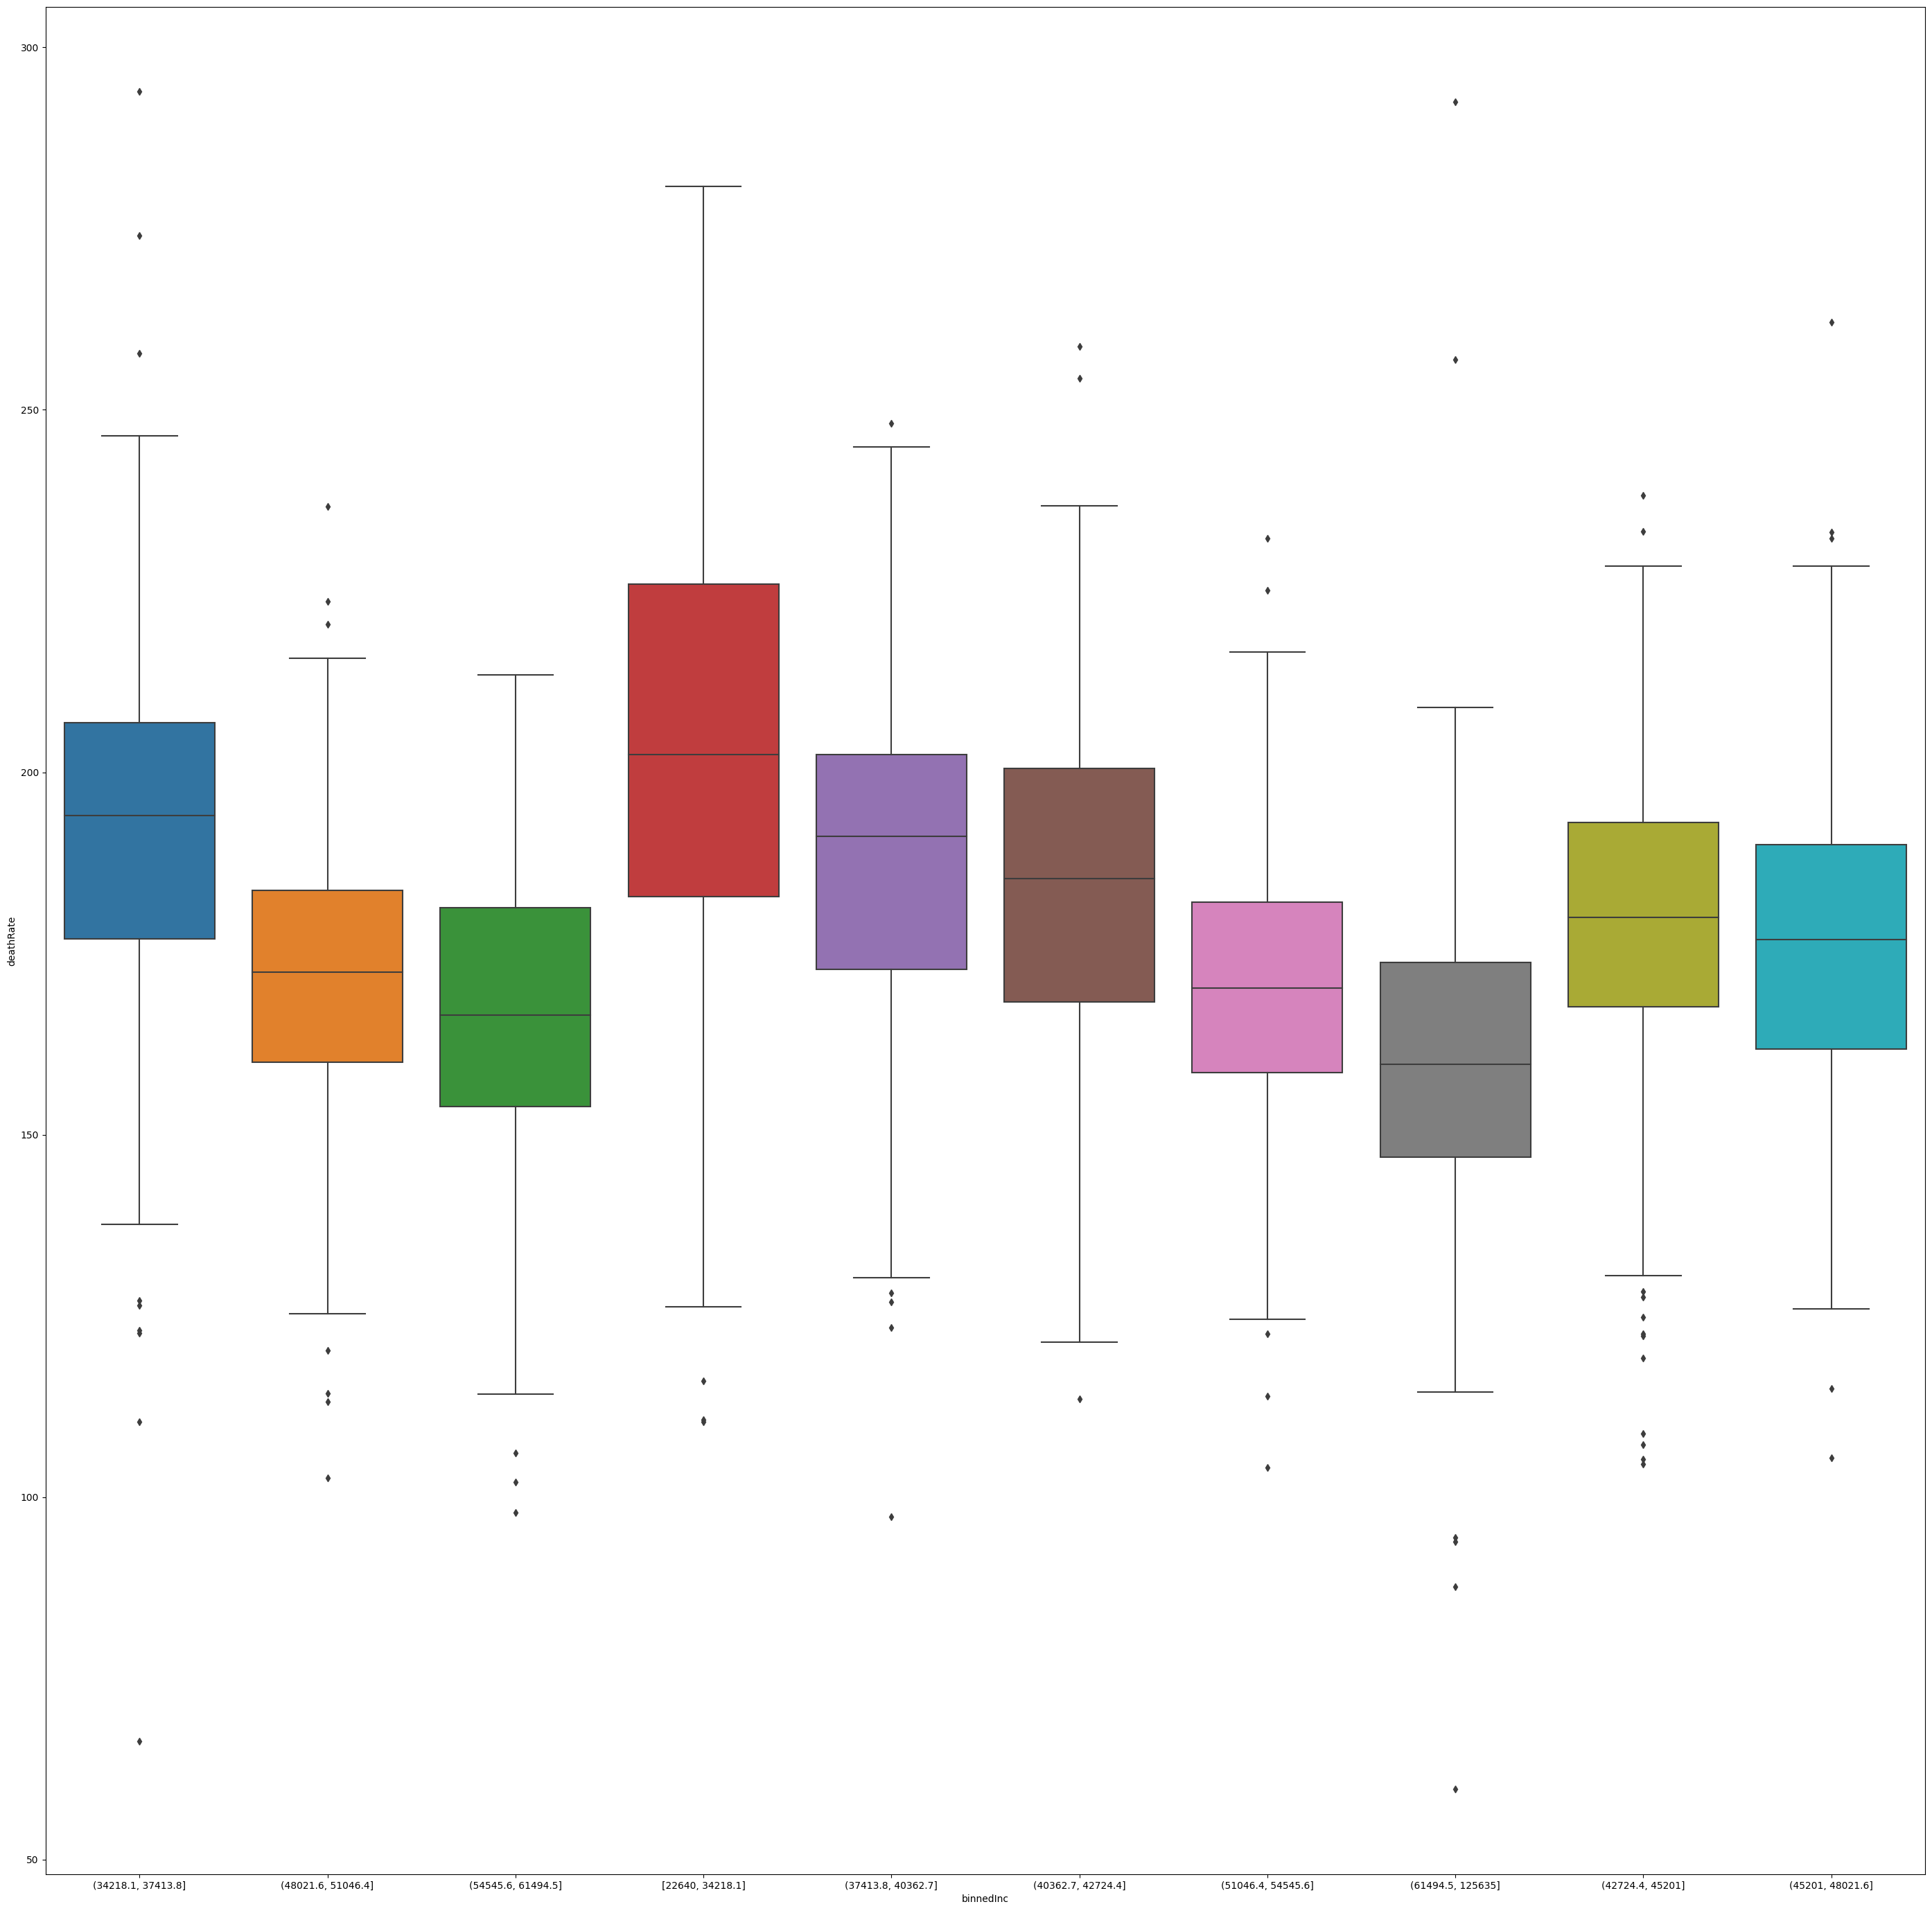

In [12]:
plt.figure(figsize=(35, 35))
sns.boxplot(x='binnedInc', y='deathRate', data=train)
plt.show()

Para la categoría de BinnedInc se puede observar que no hay uina cardinalidad alta, seguramente se le hará un OrdinalEncoder al ser intervvalos que en realidad si tienen un orden entre ellos.

#### 1.3.2. Comportamiento variables numéricas

Ahora se procederá a revisar la correlación de los datos, pues de encontrarse columnas cuya correlación es bastante alta tal vez sea necesario eliminar una de ellas.

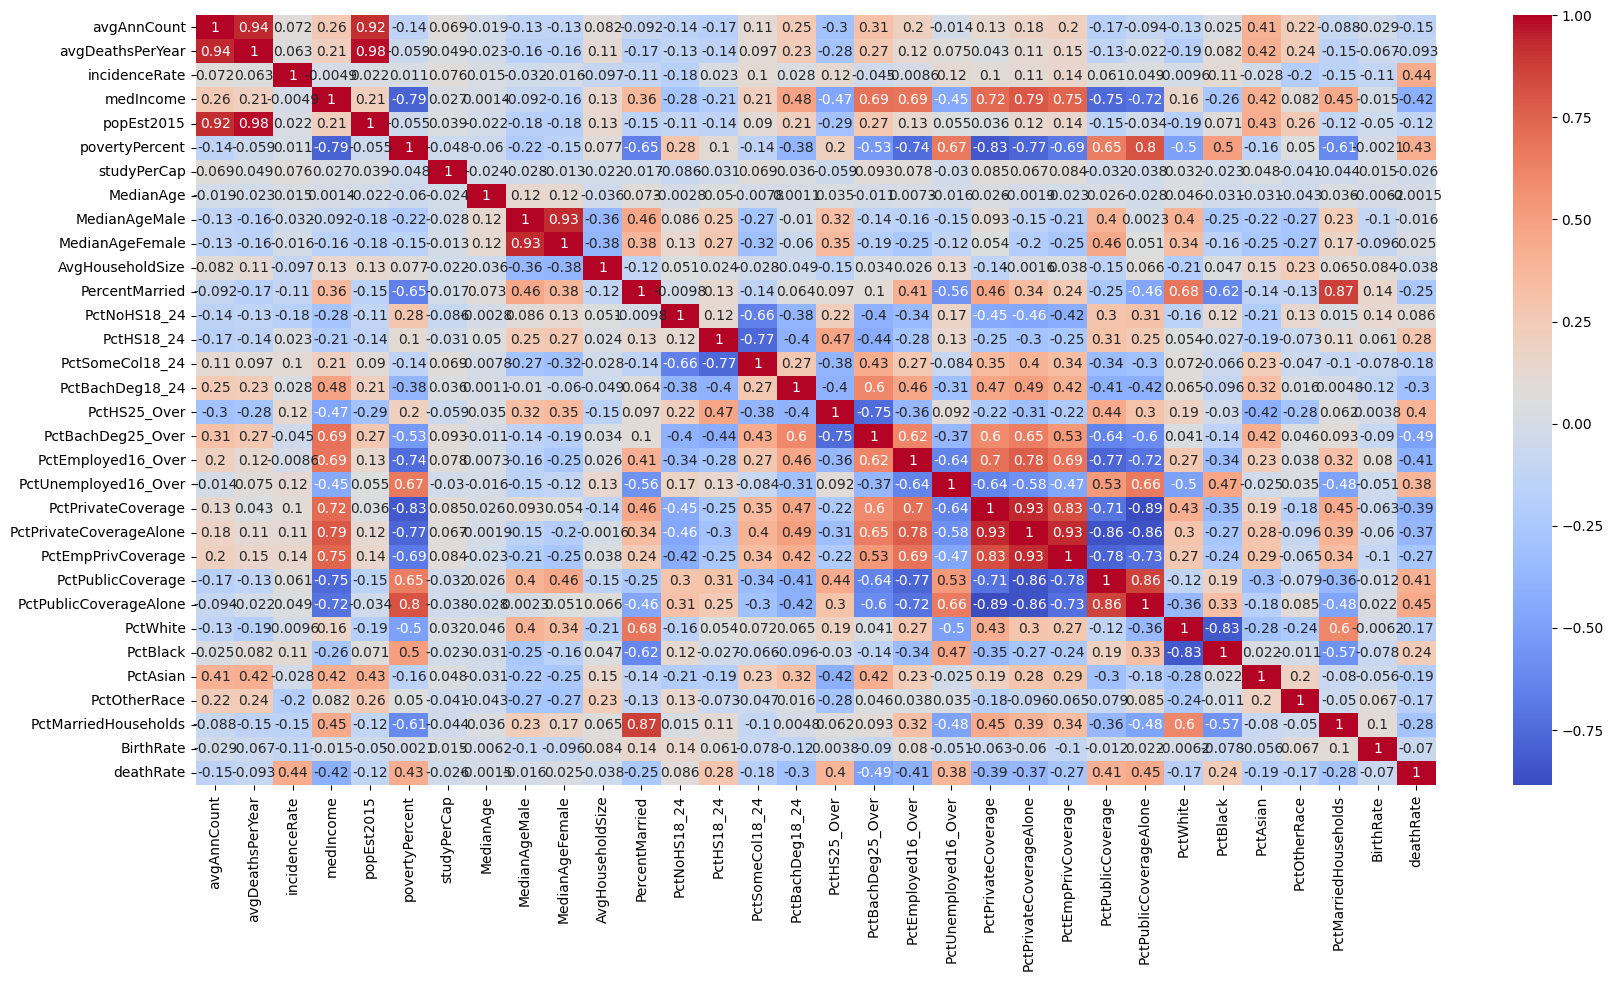

In [13]:
# Filtrar las columnas que son de tipo int o float para quitar las columnas categóricas
numeric_cols = train.select_dtypes(include=['int', 'float'])

# Calcular la matriz de correlación solo para esas columnas
correlation_matrix = numeric_cols.corr()

# Crear el heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


Como se puede ver, existen columnas que poseen alta correlación entre ellas. Será necesario retirar algunas de las columnas relacionadas

La decisión de conservar únicamente una de las características entre las que están correlacionadas se fundamenta en varios atributos de calidad de los datos. En primer lugar, desde la perspectiva de la precisión, mantener ambas características puede redundar en información similar y aumentar la complejidad del conjunto de datos sin mejorar la precisión de los análisis. Además, en términos de coherencia, conservar solo una de las características garantiza una representación de muchos elementos en el conjunto de datos, evitando posibles discrepancias en la interpretación. 

Esta acción también promueve la eficiencia computacional al reducir la dimensionalidad del conjunto de datos, lo que resulta en un procesamiento más rápido y una utilización más eficiente de los recursos. Como son tantas variables se realizará una búsqueda en la que se encuentren las correlaciones con más de 0.8, que es un valor escogido para empezar a realizar la evaluación entre las demás columnas. 

In [14]:
high_correlation_indices = np.where(np.abs(correlation_matrix) > 0.8)

# Filtrar las correlaciones para evitar duplicados y la diagonal principal
correlations = [(numeric_cols.columns[i], numeric_cols.columns[j], correlation_matrix.iloc[i, j])
                for i, j in zip(*high_correlation_indices) if i != j]
printed = []
# Mostrar las correlaciones mayores a 0.8
for col1, col2, corr in correlations:
    if (col1,col2) not in printed and (col1,col2) not in printed:
        print(f"Correlación entre {col1} y {col2}: {corr}")
        printed.append((col1,col2))
        printed.append((col2,col1))

Correlación entre avgAnnCount y avgDeathsPerYear: 0.9358070351605763
Correlación entre avgAnnCount y popEst2015: 0.9239801604159191
Correlación entre avgDeathsPerYear y popEst2015: 0.9798208784089449
Correlación entre povertyPercent y PctPrivateCoverage: -0.8279390173079699
Correlación entre povertyPercent y PctPublicCoverageAlone: 0.8024101448489753
Correlación entre MedianAgeMale y MedianAgeFemale: 0.930866647239451
Correlación entre PercentMarried y PctMarriedHouseholds: 0.870229049879577
Correlación entre PctPrivateCoverage y PctPrivateCoverageAlone: 0.933896313985271
Correlación entre PctPrivateCoverage y PctEmpPrivCoverage: 0.8268921769910806
Correlación entre PctPrivateCoverage y PctPublicCoverageAlone: -0.8857320035675356
Correlación entre PctPrivateCoverageAlone y PctEmpPrivCoverage: 0.926400819861831
Correlación entre PctPrivateCoverageAlone y PctPublicCoverage: -0.8559489070478491
Correlación entre PctPrivateCoverageAlone y PctPublicCoverageAlone: -0.8580025838911827
Correla

De acuerdo con los valores encontrados se concentrará el análisis en las siguierntes cuatro correlaciones:

__avgAnnCount - avgDeathsPerYear:__ Estas dos variables están altamente correlacionadas entre sí (de 0.9358), lo que sugiere una fuerte relación entre el número promedio de casos diagnosticados de cáncer reportados anualmente y el número promedio de muertes reportadas por cáncer. Para evitar repetición de la información se considerará solo mantener el promedio de muertes por año, que es más relacionada con el objetivo del análisis.

__popEst2015 - avgDeathsPerYear:__ También hay una correlación muy alta (0.9798) entre la población estimada en 2015 y el número promedio de muertes reportadas por cáncer. Esto tiene sentido pues a mayor población, mayor cantidad de muertes, sin embargo nuevamente por los objetivos de este análisis solo se mandtendrá el promedio de muertes reportadas.

__PctPrivateCoverage - PctPrivateCoverageAlone:__ Estas dos variables tienen una correlación muy alta (0.9339).

__PctPublicCoverage - PctPublicCoverageAlone:__ Similar al caso anterior, estas dos variables también tienen una correlación alta (0.8646).

Para estas dos variables se determina que lo mejor quedarse con el porcentaje general de ambas,todo con el objetivo de evitar redundancia en la información.

__PctMarriedHouseholds - PercentMarried:__ La correlación entre estas dos columnas es bastante alta (0.8702) por lo que solo se conservará una de ellas,  en este caso no parece haber una mas importante que la otra asi que se conservará PctMarriedHouseholds.

### 1.3. Perfilamiento de los datos

Se realiza el perfilamiento de dats para encontrar otras características que hayan escapado al análisis inicial.

In [15]:
ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

### 1.4. Decisiones de transformación de los datos

## 2. Preparación de los datos

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3524c5bb-30bf-4e95-9451-c108bdcc5d53' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>